# =====================================================
# PROJECT: PENGUIN DATA ANALYSIS & ML MODEL DEPLOYMENT
# =====================================================

In [2]:
import pandas as pd
import numpy as np

# ------------------------------------------
## SPRINT 0:  PERFORM EDA WITH BASIC PLOT
# ------------------------------------------

### 1. Data Importing and Understanding

In [5]:
df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
df.head() # reading the first 5 rows by default

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
df.tail() # reading the last 5 rows by defaut

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [9]:
df.shape # checking for the no. of rows and no. of columns

(344, 7)

In [10]:
df.info() # checking the complete information like, null/not null , Datatype of columns, memory used, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### 2. Denfine Problem statement
**Objective:** 
- The primary goal is to build a predictive Classification Model that can accurately identify the 
 species of a penguin (Adelie, Chinstrap, or Gentoo) based on its physical attributes and location.

**Why this matters:**
- Accurate species classification is vital for ecological studies. By correlating physical measurements 
(culmen, flipper, mass) with species, researchers can identify penguins non-invasively in the wild.

**Input Features:**
- Island, Culmen Length, Culmen Depth, Flipper Length, Body Mass, Sex.

**Target Variable:**
- Species.


### 3. Data Cleaning

In [13]:
# checking missing value
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

#### Observation
 - Since the missing rows are very few compared to the total data, we can drop them
 - basic rule for missing value says that if missing valuse < 5% we simply drop it
 

In [15]:
df_clean = df.dropna()

In [16]:
df_clean

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [17]:
# Special case : this Penguin dataset is having a typo error in 'sex' category "."
df_clean = df_clean[df_clean['sex'] != '.']

In [18]:
df_clean

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [19]:
print(f'\nMissing value after cleaning :\n{df_clean.isnull().sum()}')


Missing value after cleaning :
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [20]:
print(f'\nShape of data after cleaning: \n {df_clean.shape}')


Shape of data after cleaning: 
 (333, 7)


### 4. Identifying Data Types

 **we Classify the dataset attributes into the following types based on the analysis:** 

**A. Categorical (Discrete) Variables:**
1. **species** (Target): Nominal. It represents distinct categories without order.
2. **island**: Nominal. Represents geographic locations (Dream, Torgersen, Biscoe).
3. **sex**: Nominal. Represents biological sex (Male, Female).

**B. Numerical (Continuous) Variables:**
1. **culmen_length_mm**: Ratio. Continuous measurement of beak length.
2. **culmen_depth_mm**: Ratio. Continuous measurement of beak depth.
3. **flipper_length_mm**: Ratio. Continuous measurement of wing length.
4. **body_mass_g**: Ratio. Continuous measurement of weight.





### 5. Formulating the Analysis Questions

**Based on the problem statement, we formulated the following questions to guide our EDA:**

1.  **Species Distribution:** Is the dataset balanced, or is one species dominant?
2.  **Geographic Correlation:** Are certain species restricted to specific islands?
3.  **Physical Indicators:** Which feature (flipper, culmen, mass) shows the most distinct difference between species?
4.  **Feature Correlation:** Is there a strong linear relationship between Body Mass and Flipper Length?
5.  **Gender :** Does Gender play a significant role in the physical size of the penguins?


### 6. Data Visualization

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### i) target variable Distribution (species)

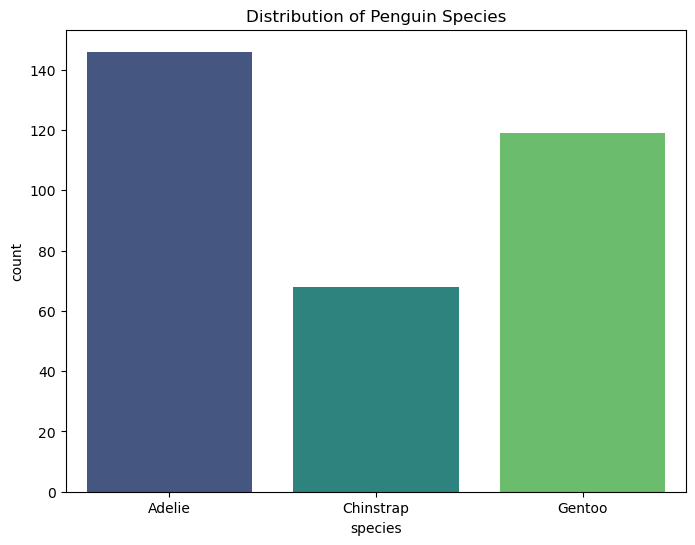

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x= 'species',data=df_clean, palette = 'viridis')
plt.title('Distribution of Penguin Species')
plt.show()

**observation :**
- the dataset is quitely imbalanced, Adelie species are more common species, followed by the 'Gentoo'
- while the 'chinstrap'species are least common

#### ii) Numerical distribution (flipper_length)

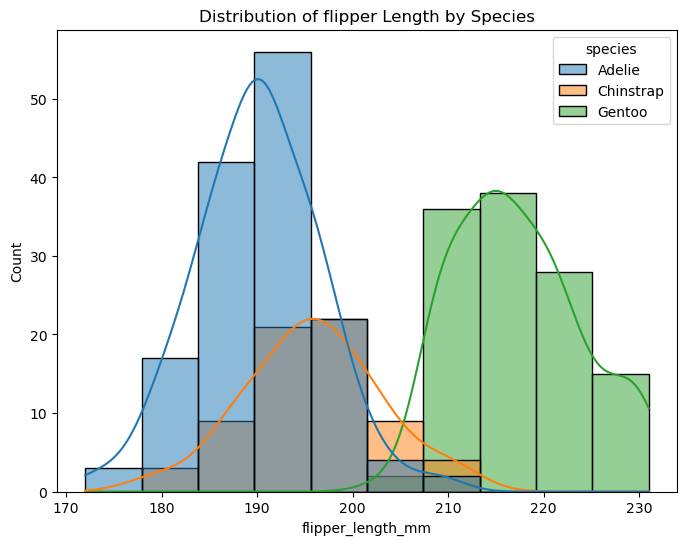

In [31]:

plt.figure(figsize=(8,6))
sns.histplot(data=df_clean,x= 'flipper_length_mm', kde=True, hue='species')
plt.title('Distribution of flipper Length by Species')
plt.show()

**observation :**
- Flippers length seems to distinct feature, as Gentoo in (green color) having higher flipper length compared
- to adelie and chinstrap

#### iii) catogrical relationship (island vs species)**

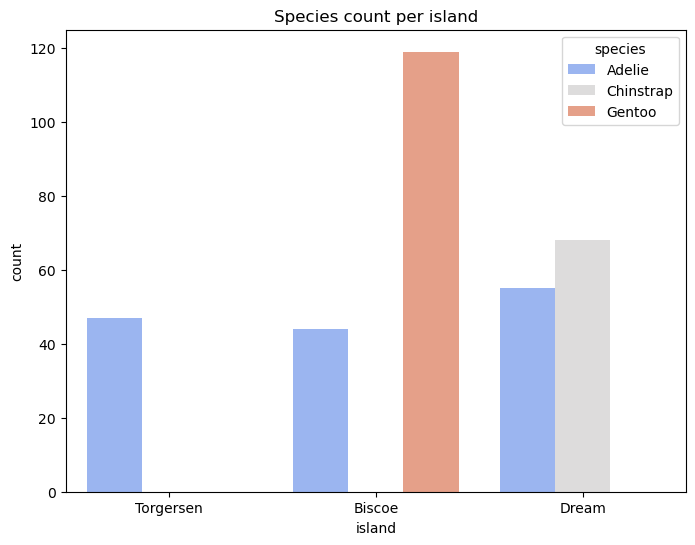

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x='island', hue= 'species', data=df_clean, palette = 'coolwarm')
plt.title('Species count per island')
plt.show()

- observation : 
- Adelie species are able to found on all island
- while the count of Gentoo species is very high on Biscoe island compared to other Torgersen and Dream
- and the count of Chinstrap species is very high on Dream island compared to Torgersen and Biscoe island

#### iv) Correlation Heatmap

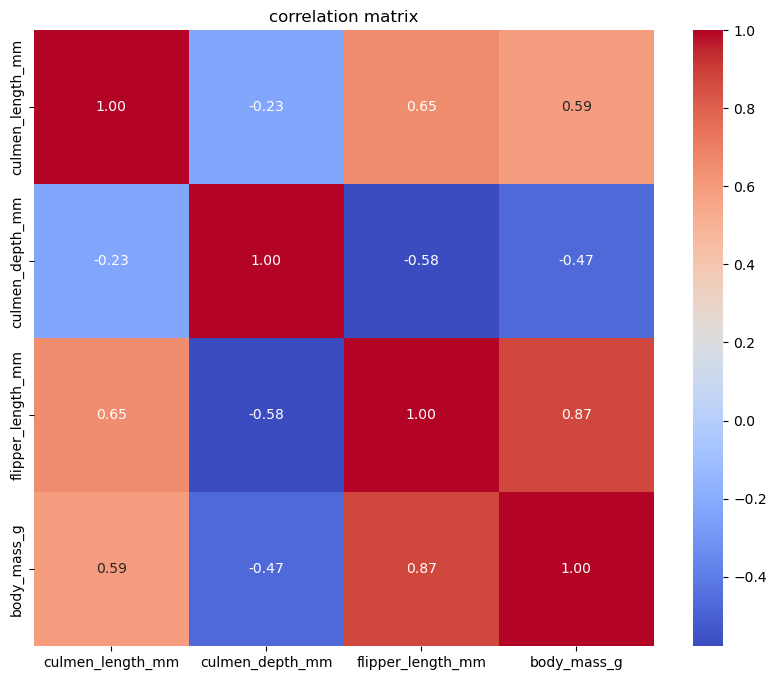

In [37]:
# note: we have to select only numeric column for correlation
plt.figure(figsize=(10,8))
numeric_df = df_clean.select_dtypes(include = ['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation matrix')
plt.show()

**observation**
- body mass g and flipperlength are highly correlated (0.87)
- well this make sense biologically (larger birds have a larger wings)

# ------------------------------------------
## SPRINT 1 : DATA PREPROCESSING
# ------------------------------------------

### Encoding categorical data (label encoder)

In [41]:
# importing preprocessing tool
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
# we need to convert species and sex into numbers so model can understand them
# we will use OneHotEncoding for 'island' and LabelEncoding for 'species' and 'sex'

### Encoding target variable (Species)

In [43]:
le = LabelEncoder()
df_clean['species']= le.fit_transform(df_clean['species'])

### check the mapping

In [45]:
print(f"Species Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Species Mapping: {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}


### Encoding 'sex' binary (0/1)

In [47]:
df_clean['sex'] = le.fit_transform(df_clean['sex'])

### Encoding 'island' using One-HotEncoding

In [49]:
df_final = pd.get_dummies(df_clean, columns=['island'], drop_first =True)

In [50]:
df_final.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,1,False,True
1,0,39.5,17.4,186.0,3800.0,0,False,True
2,0,40.3,18.0,195.0,3250.0,0,False,True
4,0,36.7,19.3,193.0,3450.0,0,False,True
5,0,39.3,20.6,190.0,3650.0,1,False,True


## SPLITING DATA

## spliting data into train test split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x = df_final.drop('species', axis =1)
y = df_final['species']

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state =42)

In [56]:
x_train.shape

(266, 7)

In [57]:
x_test.shape

(67, 7)

# ------------------------------------------
## Sprint 2: MODEL DOVELOPMENT
# ------------------------------------------

### Training Model

In [60]:
# imorting the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
models = {'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
          'Support Vector Machine': SVC(random_state =42),
          'Decision Tree': DecisionTreeClassifier(random_state=42),
          'Random forest': RandomForestClassifier(n_estimators = 100, random_state = 42)}

In [62]:
results = {}
best_model_name = []
best_accuracy = 0
best_model_object = None

In [63]:
print(f'Traning {len(models)} different models to find the best one')

Traning 4 different models to find the best one


In [64]:
for name, model in models.items():
    print(f'Traing {name} model')
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    results[name] = acc

    print(f'{name} : {acc*100:.2f}%')

    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name
        best_model_object = model

    

Traing Logistic Regression model
Logistic Regression : 98.51%
Traing Support Vector Machine model
Support Vector Machine : 73.13%
Traing Decision Tree model
Decision Tree : 98.51%
Traing Random forest model
Random forest : 100.00%


### Visualization for model comparision based on Accuracy Score

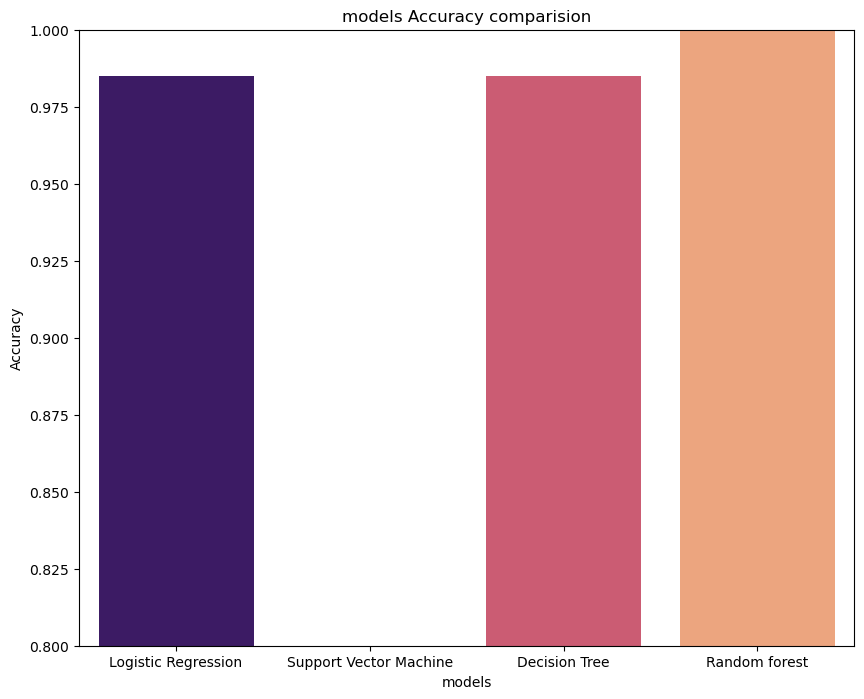

In [66]:
plt.figure(figsize =(10,8))
sns.barplot(x=results.keys(), y=results.values(),palette = 'magma')
plt.title('models Accuracy comparision')
plt.ylim(0.8,1.0)
plt.ylabel('Accuracy')
plt.xlabel('models')
plt.show()

In [67]:
print(f"\nObservation:\n The comparative analysis shows that '{best_model_name}'performed the best with an accuracy of {best_accuracy*100:.2f}%.")



Observation:
 The comparative analysis shows that 'Random forest'performed the best with an accuracy of 100.00%.


### classification report

In [69]:
best_model_name
y_pred_best = best_model_object.predict(x_test)
print(f'\nclassification Report:\n {classification_report(y_test,y_pred_best)}')



classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



### confusion matrix

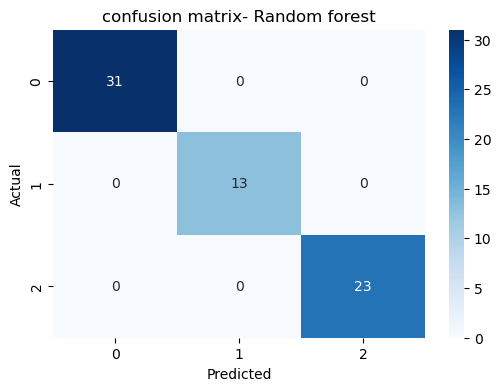

In [71]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred_best), annot=True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'confusion matrix- {best_model_name}')
plt.show()

- observation:
- The model performed extremely well (likely >95%). 
- The confusion matrix shows very few misclassifications, meaning the physical traits + island are strong predictors of species.")

# ------------------------------------------
## Sprint 3 : MODEL DEPLOYMENT 
# ------------------------------------------

In [74]:
# importing pickle to save this model/file
import pickle

In [75]:
filename = 'penguin_model.pkl'

In [76]:
# Dumping the trained model into a file
with open(filename, 'wb') as file:
    pickle.dump(best_model_name, file)

In [77]:
print(f"Success! Model has been saved as '{filename}'.")

Success! Model has been saved as 'penguin_model.pkl'.


In [78]:
print("To use this model later, you would load this file and pass new data to it.")

To use this model later, you would load this file and pass new data to it.


In [79]:
print(" "*50 + "PROJECT COMPLETED" + " "*50)

                                                  PROJECT COMPLETED                                                  
